In [1]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# Read CSV files
test_images = pd.read_csv('csvTestImages 3360x1024.csv', header=None)
test_label= pd.read_csv('csvTestLabel 3360x1.csv', header=None)-1

train_images =  pd.read_csv('csvTrainImages 13440x1024.csv', header=None) 
train_label = pd.read_csv('csvTrainLabel 13440x1.csv', header=None)-1

In [3]:
# Display basic information about the datasets
print("Training set shape:", train_images.shape)
print("Testing set shape:", test_images.shape)

Training set shape: (13440, 1024)
Testing set shape: (3360, 1024)


In [4]:
image_size = (32, 32)

train_images= train_images.values.reshape(-1, *image_size,1)
test_images = test_images.values.reshape(-1, *image_size,1)

train_images.shape, test_images.shape

((13440, 32, 32, 1), (3360, 32, 32, 1))

In [5]:
train_images = train_images.astype('float32')
test_images  = test_images.astype('float32')
# Normalize pixel values to the range [0, 1]
# train_images = train_images / 255.0
# test_images= test_images / 255.0

In [6]:
# Change the labels from categorical to one-hot encoding
train_label_one_hot = to_categorical(train_label)
test_label_one_hot = to_categorical(test_label)

# Display the change for category label using one-hot encoding
print('Original label:', train_label.iloc[0].values[0])
print('After conversion to one-hot:', train_label_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [7]:
print('Original label:', train_label.iloc[9].values[0])
print('After conversion to one-hot:', train_label_one_hot[9])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


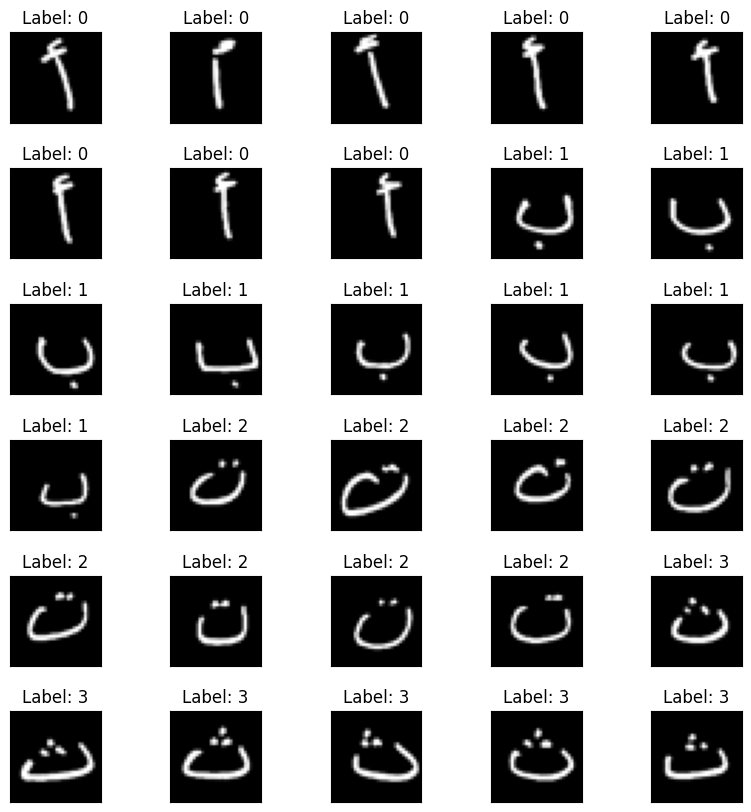

In [8]:
# # Display a few images from the training set
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[[i]].reshape(32, 32).T, "gray")
    plt.title(f"Label: {train_label.iloc[i, 0]}")
    plt.subplots_adjust(hspace=0.5)
plt.show()


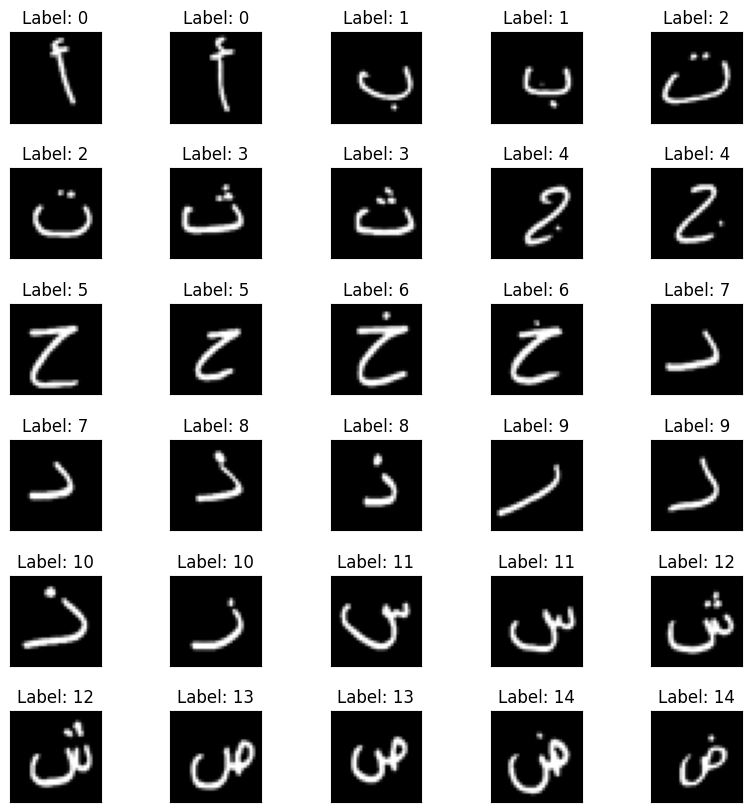

In [9]:
# Display a few images from the training
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i].reshape(32, 32).T, "gray")
    plt.title(f"Label: {test_label.iloc[i, 0]}")
    plt.subplots_adjust(hspace=0.5)
plt.show()

In [10]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.2, 0.6),  # Adjust the range as needed
    # contrast_range=0.2
)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ReLU, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import DenseNet121
import tensorflow as tf

In [12]:
epochs = 80
batch_size = 120

In [13]:
model = Sequential()

# Layer 1 (adjusted for smaller input)
model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Layer 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Layer 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

# Layer 4
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

# Layer 5
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

# Fully connected layers (reduced for smaller feature vectors)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer (adjust for your number of classes)
model.add(Dense(28, activation='softmax'))  # Assuming 28 classes in your case

In [14]:
# Compile the model with Adam optimizer and learning rate 0.001
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         1

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model_history = model.fit(datagen.flow(train_images, train_label_one_hot, batch_size=batch_size),
                          epochs=epochs,
                          batch_size=batch_size,
                          verbose=1,
                          validation_data=(test_images, test_label_one_hot),
                          callbacks=[early_stopping])

Epoch 1/80


112/112 [==============================] - 9s 67ms/step - loss: 2.9714 - accuracy: 0.1272 - val_loss: 1.8217 - val_accuracy: 0.4283
Epoch 2/80
112/112 [==============================] - 8s 70ms/step - loss: 1.7089 - accuracy: 0.4205 - val_loss: 0.9025 - val_accuracy: 0.7193
Epoch 3/80
112/112 [==============================] - 7s 65ms/step - loss: 1.1770 - accuracy: 0.6019 - val_loss: 0.9970 - val_accuracy: 0.7896
Epoch 4/80
112/112 [==============================] - 7s 66ms/step - loss: 0.8914 - accuracy: 0.7002 - val_loss: 0.6166 - val_accuracy: 0.8649
Epoch 5/80
112/112 [==============================] - 8s 67ms/step - loss: 0.7093 - accuracy: 0.7704 - val_loss: 0.5706 - val_accuracy: 0.8798
Epoch 6/80
112/112 [==============================] - 7s 65ms/step - loss: 0.6378 - accuracy: 0.7976 - val_loss: 0.5413 - val_accuracy: 0.9036
Epoch 7/80
112/112 [==============================] - 8s 67ms/step - loss: 0.5214 - accuracy: 0.8382 - val_loss: 0.4659 - val_accuracy: 0.91

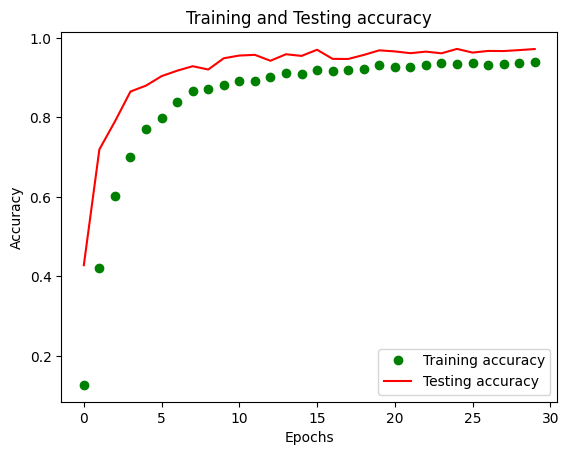

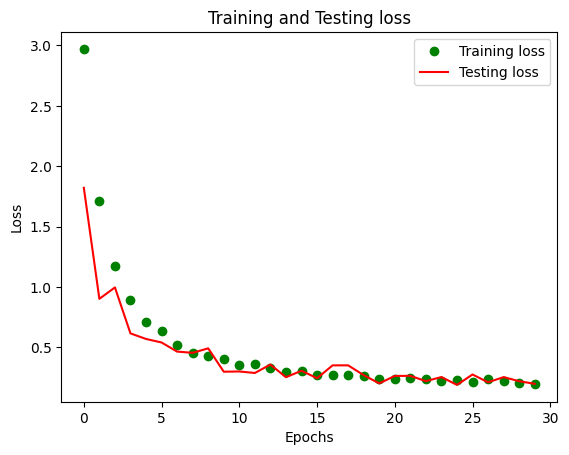

In [17]:
training_acc = model_history.history['accuracy']
testing_accuracy = model_history.history['val_accuracy']
training_loss = model_history.history['loss']
testing_loss = model_history.history['val_loss']
epochs = range(len(testing_accuracy))

# Plotting accuracy
plt.plot(epochs, training_acc, 'go', label='Training accuracy')  # Change color to green
plt.plot(epochs, testing_accuracy, 'r', label='Testing accuracy')   # Change color to red
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.figure()
plt.plot(epochs, training_loss, 'go', label='Training loss')  
plt.plot(epochs, testing_loss, 'r', label='Testing loss')       
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
test_label_1d = test_label.squeeze()

105/105 [==============================] - 1s 7ms/step
Found 3265 correct labels


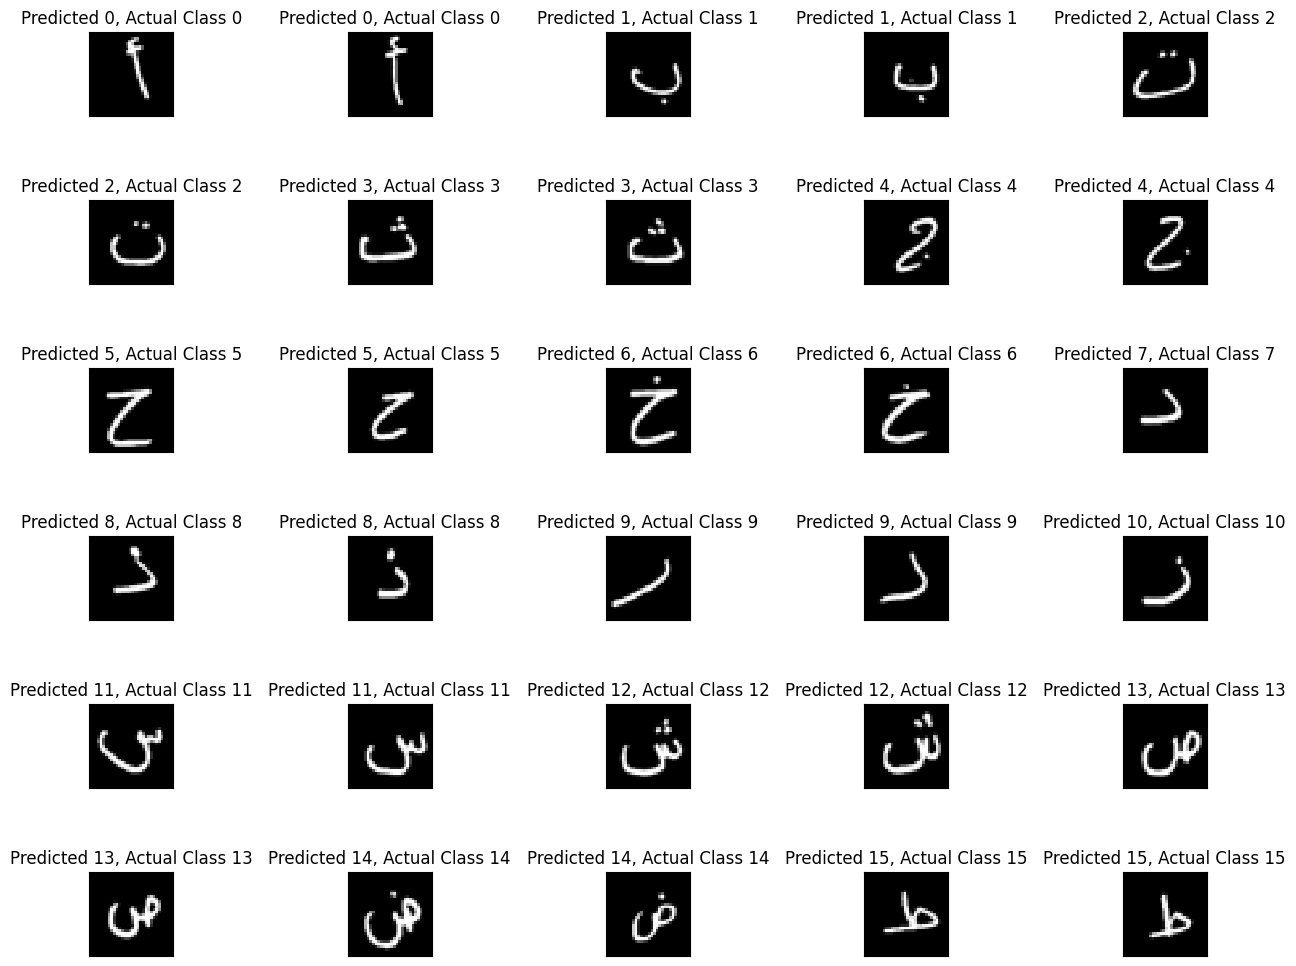

In [19]:
predicted_classes= model.predict(test_images)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

correct = np.where(predicted_classes == test_label_1d)[0]
print("Found %d correct labels" % len(correct))

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=1, wspace=1)

for i, idx in enumerate(correct[:30]):
    plt.subplot(6,5, i + 1)

    plt.imshow(test_images[idx].reshape(32, 32).T, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual Class {}".format(predicted_classes[idx], test_label_1d[idx]))
    plt.xticks([]) 
    plt.yticks([]) 

plt.show()

Found 95 incorrect labels


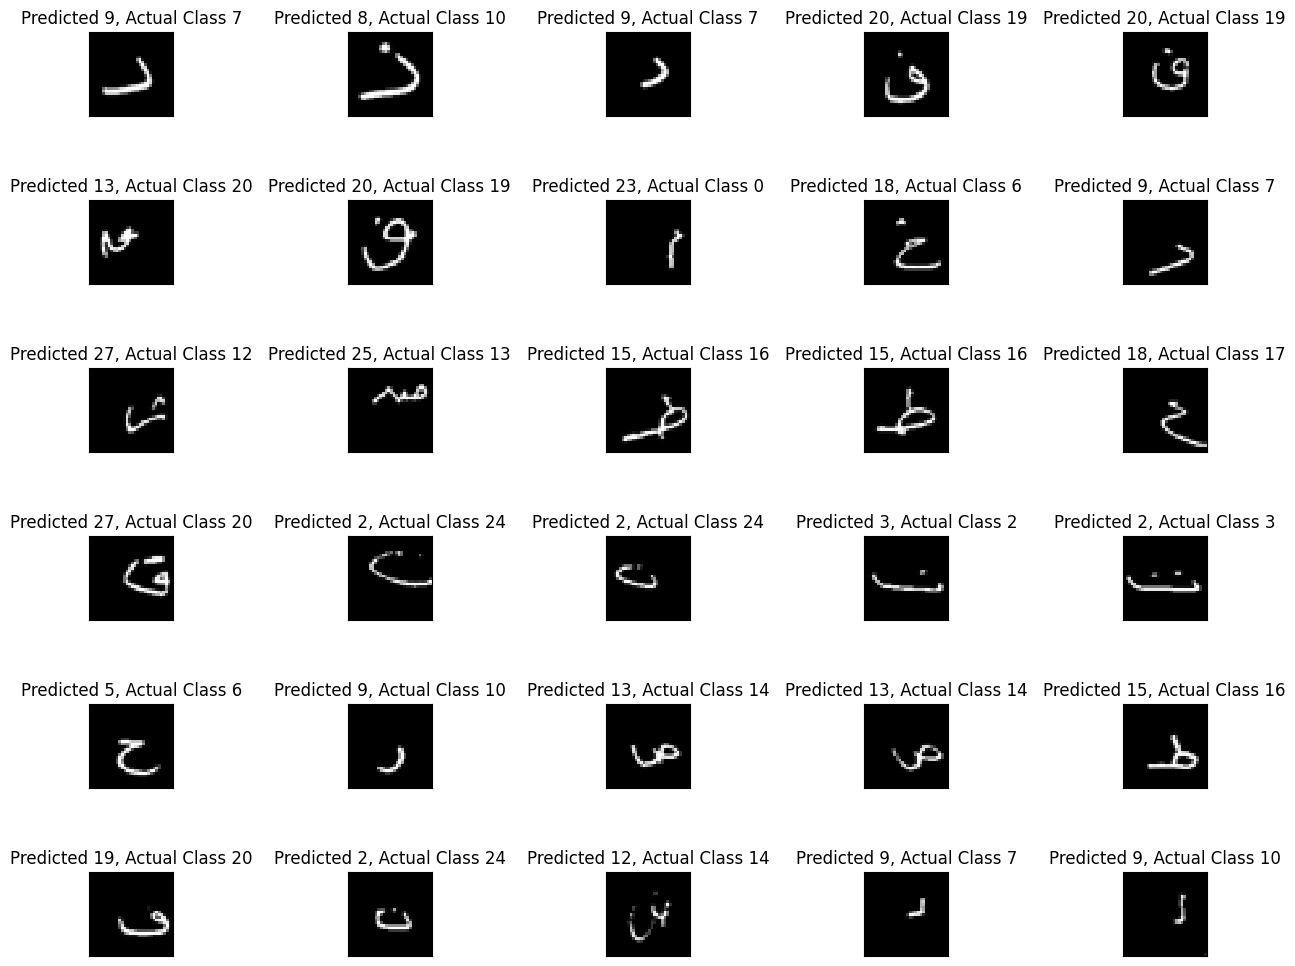

In [20]:
incorrect = np.where(predicted_classes != test_label_1d)[0]
print("Found %d incorrect labels" % len(incorrect))

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=1, wspace=1)

for i, idx in enumerate(incorrect[:30]):
    plt.subplot(6,5, i + 1) 

    plt.imshow(test_images[idx].reshape(32, 32).T, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual Class {}".format(predicted_classes [idx], test_label_1d[idx]))
    plt.xticks([]) 
    plt.yticks([]) 

plt.show()